# Visualization with Python



<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="http://yogen.io/assets/logo.svg" alt="yogen" style="width: 200px; float: right;"/>

# `matplotlib`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Matplotlib basic plotting

A MATLAB-like plotting framework: [`pyplot`](https://matplotlib.org/api/pyplot_api.html). 

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

### Lines

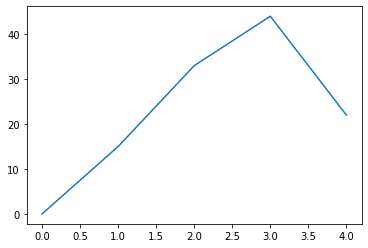

In [3]:
plt.plot([0,1,2,3,4], [0, 15, 33, 44, 22])

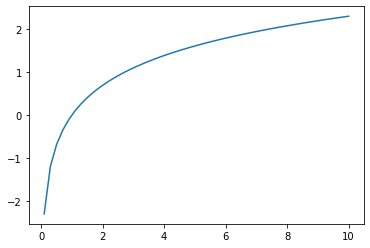

In [4]:
xs = np.linspace(0.1, 10)
ys = np.log(xs)
plt.plot(xs,ys)

#### Exercise

Plot the logistic function 


$$f(x) = \frac{e^x}{1 + e^x}$$

Between -7 and 7


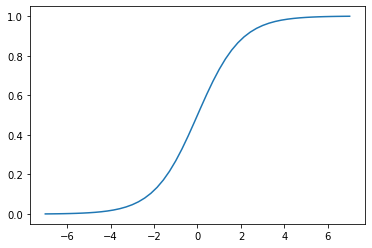

In [5]:
xs = np.linspace(-7,7)
ys = np.exp(xs)/(1+np.exp(xs))
plt.plot(xs, ys)

### Scatter plots

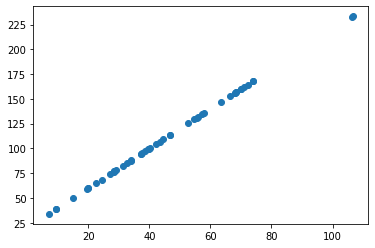

In [6]:
xs = np.random.randn(50)*30 + 50
ys = 2*xs + 20
plt.scatter(xs, ys)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


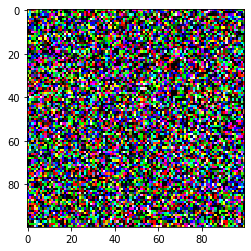

In [7]:
plt.imshow(np.random.randn(100,100,3))

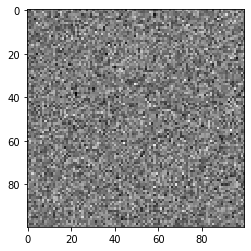

In [8]:
plt.imshow(np.random.randn(100,100), cmap='gray')

Here we are using a random noise ("jitter"
) added over the (perfectly following $f(x) = 2x + 20$) Y2 Series in order to get some noisier, more real-looking generated data.


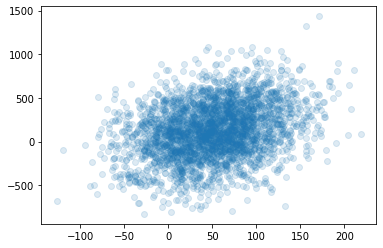

In [9]:
xs = np.random.randn(3000)*50 +50
ys = 2*xs +20 +np.random.randn(3000)*300
plt.scatter(xs, ys, alpha=.15)

This is what happens if you make a line plot of unsorted data:

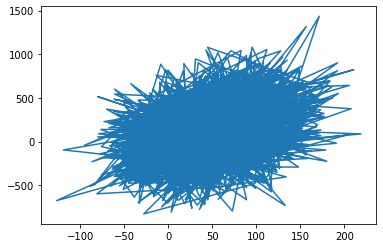

In [10]:
plt.plot(xs,ys)

In [11]:
xs

array([ 20.70386416,  -3.09342044, 108.86081741, ...,  92.82648558,
       -77.11593234,  55.58046958])

### Bar plots

Do not confuse with histograms

([<matplotlib.axis.XTick at 0x1fcc5ffab48>,
 <a list of 3 Text xticklabel objects>)

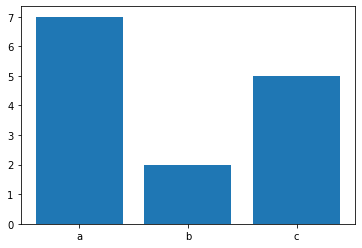

In [12]:
plt.bar(range(3), [7,2,5])
plt.xticks(range(3), ['a', 'b', 'c'])

## The object-oriented interface

Essential for finer control.

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

We need to know the somewhat confusing [matplotlib terminology](http://matplotlib.org/faq/usage_faq.html#parts-of-a-figure)

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

#### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.

#### Axes vs Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3, `Axis`. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.

#### Artists

There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).

https://matplotlib.org/users/artists.html

### Interlude: the recommended interface for our plotting functions

From [the matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html):

```python
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    
    out = ax.plot(data1, data2, **param_dict)
    return out
```

## `add_axes()`, `add_subplot`, and `subplots()` 

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### `add_axes()`

See https://matplotlib.org/users/artists.html

Total flexibility in placing the Axes: we specify `[left, bottom, width, height]` in 0-1 relative figure coordinates.

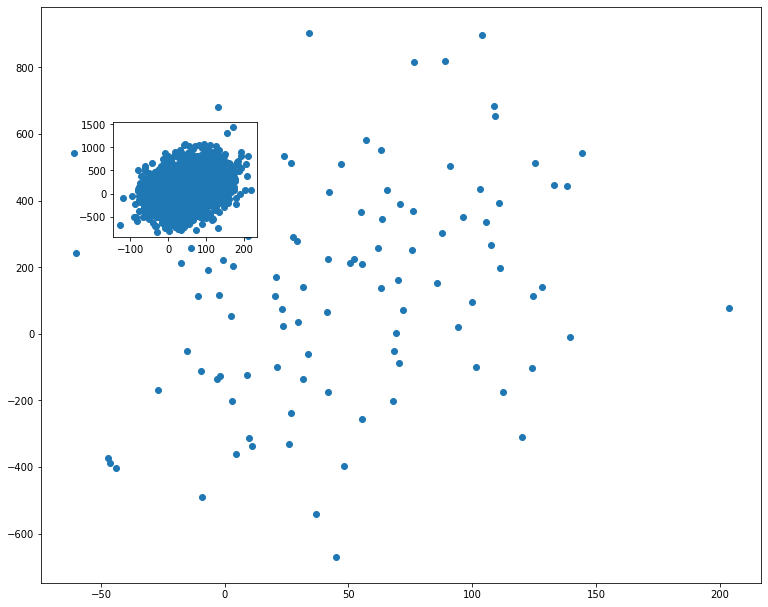

In [13]:
f = plt.figure(figsize=(10,8))
axes1 = f.add_axes([0,0,1,1])
axes2 = f.add_axes([0.10,0.6,0.2,0.2])

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

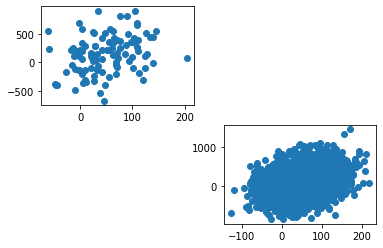

In [14]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(2,2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

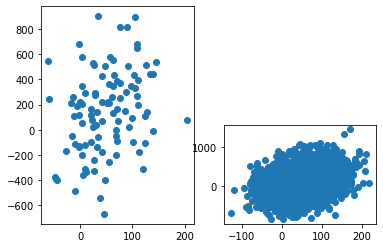

In [15]:
f = plt.figure(figsize=(6,4))
axes1 = f.add_subplot(1, 2,1)
axes2 = f.add_subplot(2,2,4)

axes1.scatter(xs[:100],ys[:100])
axes2.scatter(xs,ys)

### `plt.subplots()`

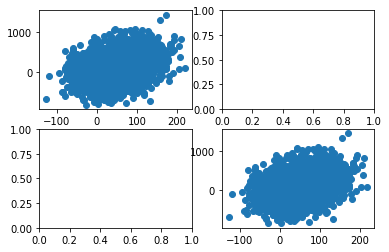

In [16]:
f, ax = plt.subplots(2,2)
ax[0,0].scatter(xs,ys)
ax[1,1].scatter(xs,ys)

### Sharing axis

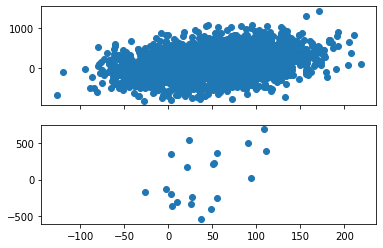

In [17]:
f, ax = plt.subplots(2,1, sharex=True)
ax[0].scatter(xs,ys)
ax[1].scatter(xs[:20],ys[:20])

## `fill_between`

We can fill areas of the plot with solid color

The syntax is 

```python
plt.fill_between(X, Y1, Y2)
```

Where Y1 and Y2 are either `np.array`s or scalar values.

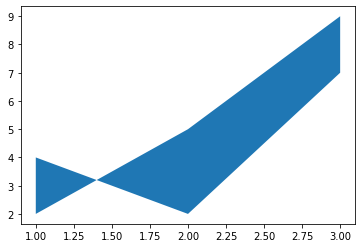

In [18]:
plt.fill_between([1,2,3], [4,2,7], [2,5,9])

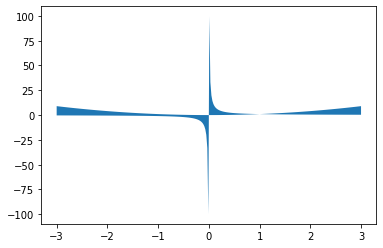

In [19]:
xs = np.linspace(-3, 3, 300)

plt.fill_between(xs, xs ** 2, 1 / xs)

#### Exercise:
Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

![Exercise](figs/plot_ex.png)



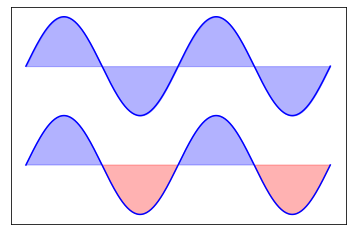

In [20]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.fill_between(X, Y+1, 1, alpha=.3, color='blue')
plt.fill_between(X, Y-1, -1, alpha=.3, color='blue', where=Y-1 > -1)
plt.fill_between(X, Y-1, -1, alpha=.3, color='red', where=Y-1 < -1)
plt.xticks([])
plt.yticks([])
plt.savefig('sine_exercise.png')

## Line properties


### Color

See https://matplotlib.org/users/colormaps.html

![Colormaps](https://matplotlib.org/_images/grayscale_01_00.png)

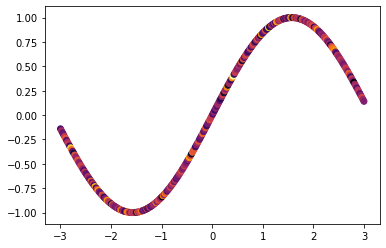

In [21]:
from matplotlib import cm

cmap = cm.get_cmap('inferno')
plt.scatter(xs, np.sin(xs), c=np.random.randn(len(xs)), cmap=cmap)

#### Exercise

Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

![Color exercise](figs/scatter_ex.png)

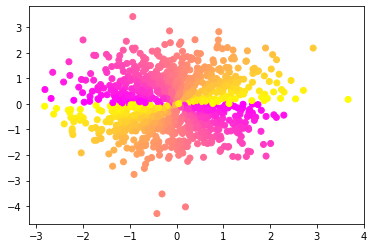

In [22]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
cmap = cm.get_cmap('spring')

plt.scatter(X,Y, c=np.arctan(X/Y), cmap=cmap)
plt.show()

### Markers and linestyles

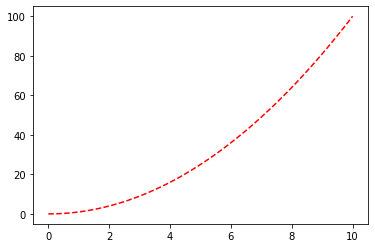

In [23]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')

## Other attributes

http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

(array([ 5.,  3., 11., 11., 10., 21., 29., 60., 62., 87., 72., 95., 99.,
        80., 81., 67., 52., 54., 42., 29., 21., 13., 10.,  5.,  2.,  1.,
         1.,  0.,  0.,  1.]),
 array([-2.82453221, -2.60806609, -2.39159997, -2.17513386, -1.95866774,
        -1.74220162, -1.5257355 , -1.30926939, -1.09280327, -0.87633715,
        -0.65987103, -0.44340491, -0.2269388 , -0.01047268,  0.20599344,
         0.42245956,  0.63892567,  0.85539179,  1.07185791,  1.28832403,
         1.50479014,  1.72125626,  1.93772238,  2.1541885 ,  2.37065461,
         2.58712073,  2.80358685,  3.02005297,  3.23651908,  3.4529852 ,
         3.66945132]),
 <a list of 30 Patch objects>)

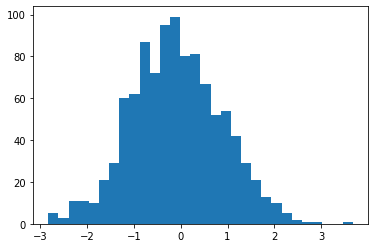

In [24]:
plt.hist(X, bins=30)

## Text and Math: $\LaTeX$

$\LaTeX$ is "a high-quality typesetting system; it includes features designed for the production of technical and scientific documentation. LaTeX is the de facto standard for the communication and publication of scientific documents" ([$LaTeX$ project website](https://www.latex-project.org/)).

It's widely used for writing mathematical equations that need to be rendered accurately.

We can use it in pretty much any place we need to use text.

$$\mu = \frac{\sum_{i=1}^nx_i}{n}$$

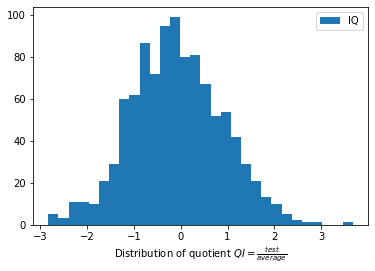

In [25]:
plt.hist(X, bins=30, label='IQ')
plt.xlabel(r'Distribution of quotient $QI=\frac{test}{average}$')
plt.legend()

## Ticks, tick labels, limits

### Ticks

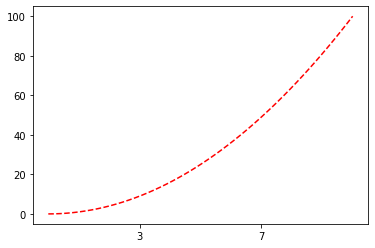

In [26]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);

### Tick labels

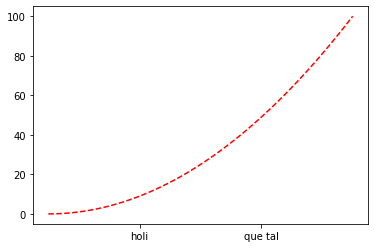

In [27]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);

### Limits

(20, 60)

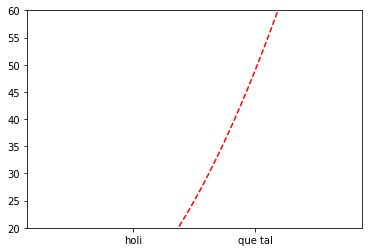

In [28]:
xs = np.linspace(0, 10)
ys = xs ** 2

plt.plot(xs, ys, 'r--')
ax = plt.gca()
ax.set_xticks([3,7]);
ax.set_xticklabels(['holi','que tal']);
ax.set_ylim(20, 60)

# Seaborn

Seaborn is a statistical data visualization library. It's built on top of matplotlib and tries to "make a well-defined set of hard things easy" ([introduction to Seaborn](http://seaborn.pydata.org/introduction.html)).

One advantage over matplotlib is that it works natively with DataFrame objects.


https://www.datacamp.com/community/tutorials/seaborn-python-tutorial



#### Exercise:

Load the `houses.csv` file into memory as a pandas `DataFrame`. Inspect its head. Clean the column names.

In [33]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('houses.csv')
df.head()

,index,the local selling prices in hundreds of dollars,the number of bathrooms,the area of the site in thousands of square feet,the size of the living space (1000 square feet),number of garages,number of rooms,the number of bedrooms,the age in years,construction type,architecture type,number of fire places,selling price
0,1,4.9176,1.0,3.472,0.998,1.0,7,4,42,3,1,0,25.9
1,2,5.0208,1.0,3.531,1.500,2.0,7,4,62,1,1,0,29.5
2,3,4.5429,1.0,2.275,1.175,1.0,6,3,40,2,1,0,27.9
3,4,4.5573,1.0,4.050,1.232,1.0,6,3,54,4,1,0,25.9
4,5,5.0597,1.0,4.455,1.121,1.0,6,3,42,3,1,0,29.9


In [64]:
short_column_names = ['index', 'local_prices', 'bathrooms', 'site_area',
'living_area', 'garages', 'rooms',
'bedrooms', 'age', 'construction_type',
'architecture', 'fireplaces', 'price']

In [65]:
df.columns = short_column_names

## Seaborn vs matplotlib



## Distribution plots

https://seaborn.pydata.org/tutorial/distributions.html

### Scatter plots

In [50]:
df.shape

(28, 13)

In [49]:
sns.jointplot(df['local prices'], df['price'])

KeyError: 'local prices'

### Histogram

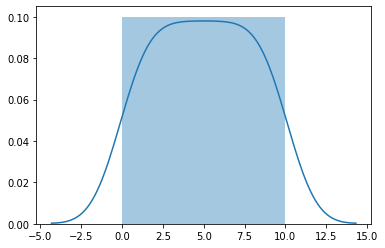

In [48]:
sns.distplot(xs, bins = 10)

In [40]:
xs

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

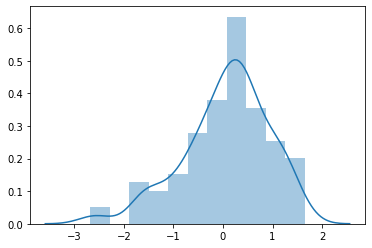

In [46]:
sns.distplot(np.random.randn(100))
#Esta función devuelve un matplotlib con  subplots y AxesSubplot

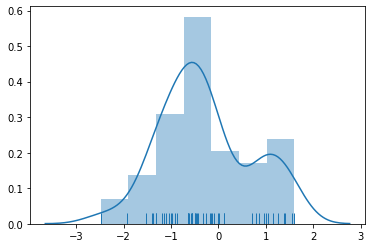

In [53]:
sns.distplot(np.random.randn(50), rug = True)
#Kernel density distribution

More on [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html)

### Pairwise relationships

In [66]:
df.columns

Index(['index', 'local_prices', 'bathrooms', 'site_area', 'living_area',
       'garages', 'rooms', 'bedrooms', 'age', 'construction_type',
       'architecture', 'fireplaces', 'price'],
      dtype='object')

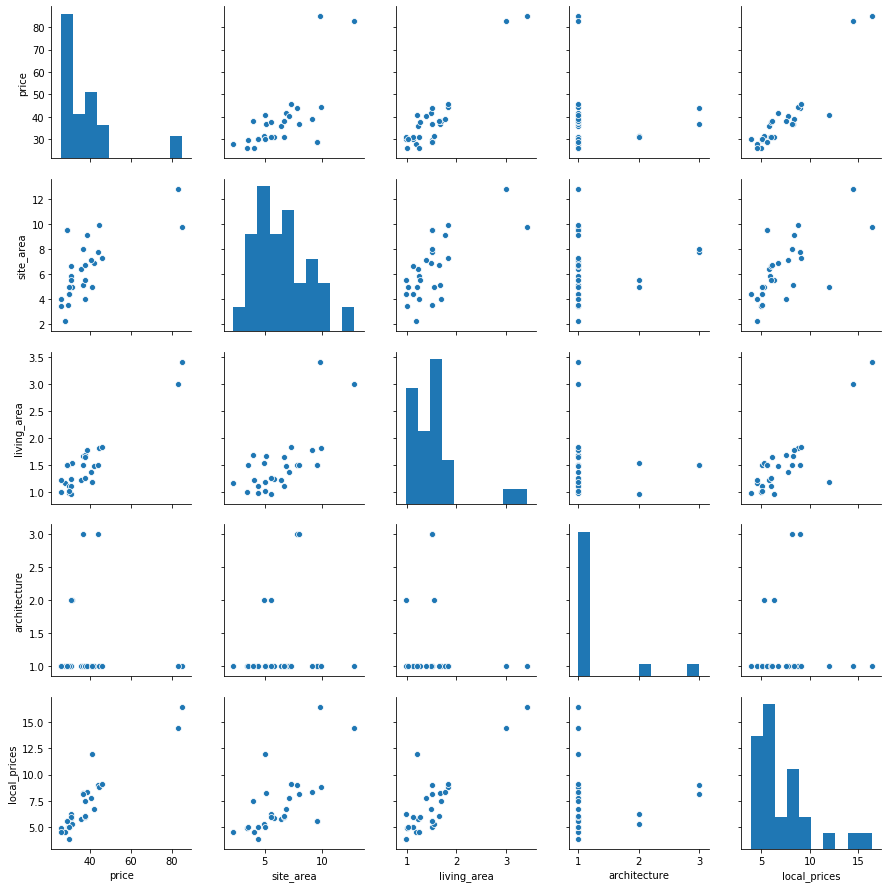

In [67]:
sns.pairplot(df[['price', 'site_area', 'living_area', 'architecture', 'local_prices']])

## Linear relationships

https://seaborn.pydata.org/tutorial/regression.html

### `lmplot()`

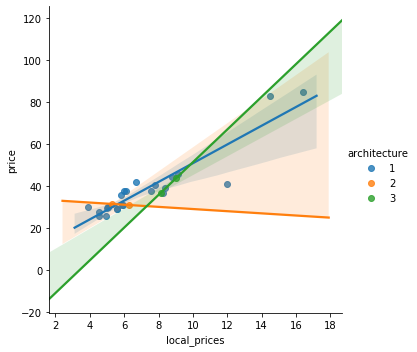

In [69]:
sns.lmplot(data=df, x = 'local_prices', y = 'price', hue = 'architecture')

## Categorical data

Es el hola mundo de los datos:
https://www.kaggle.com/c/titanic/download/train.csv

https://seaborn.pydata.org/tutorial/categorical.html

In [72]:
titanic = pd.read_csv('train.csv')
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Swarm plot

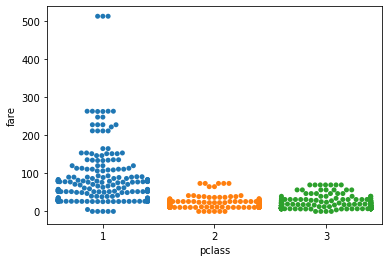

In [75]:
sns.swarmplot(data = titanic, x = 'pclass', y = 'fare')

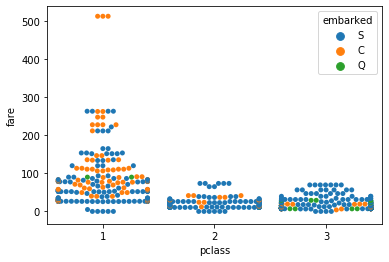

In [74]:
sns.swarmplot(data = titanic, x = 'pclass', y = 'fare', hue = 'embarked')

### Boxplot

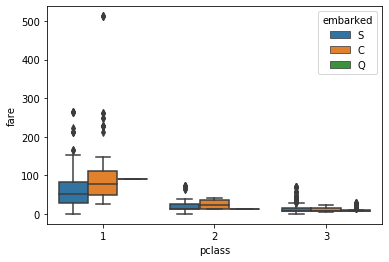

In [76]:
sns.boxplot(data = titanic, x = 'pclass', y = 'fare', hue = 'embarked')

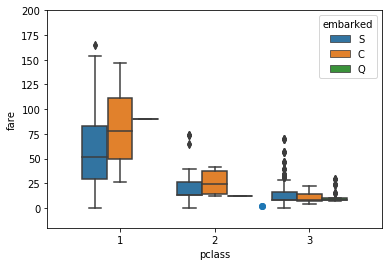

In [80]:
ax = sns.boxplot(data = titanic, x = 'pclass', y = 'fare', hue = 'embarked')

ax.set_ylim(-20, 200)
ax.scatter([1.5, 1.5], [2,2])

(-20, 200)

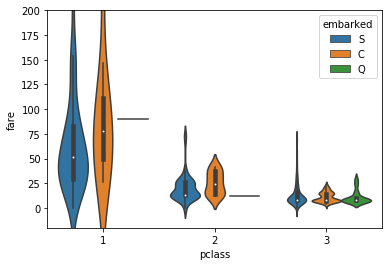

In [79]:
ax = sns.violinplot(data = titanic, x = 'pclass', y = 'fare', hue = 'embarked')

ax.set_ylim(-20, 200)

### Barplot / countplot

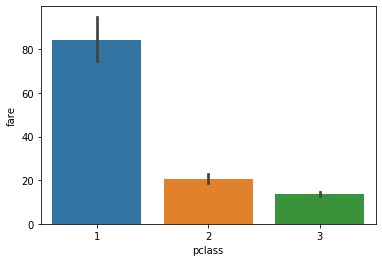

In [82]:
sns.barplot(data = titanic, x = 'pclass', y = 'fare')

### Pointplot

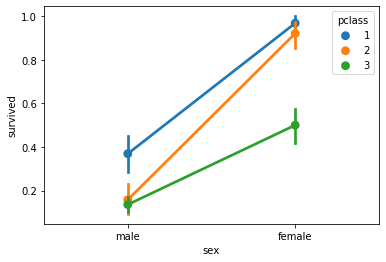

In [86]:
sns.pointplot(data = titanic, x = 'sex', hue ='pclass', y = 'survived')

## Other types

### Heatmap

In [87]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


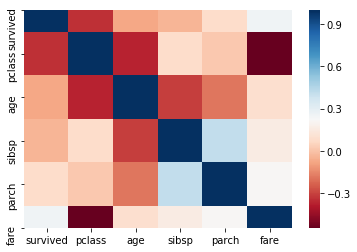

In [90]:
sns.heatmap(titanic.corr(), cmap = 'RdBu')
#No se debe tener demasiad colinealidad entre variables independientes

### Clustermap

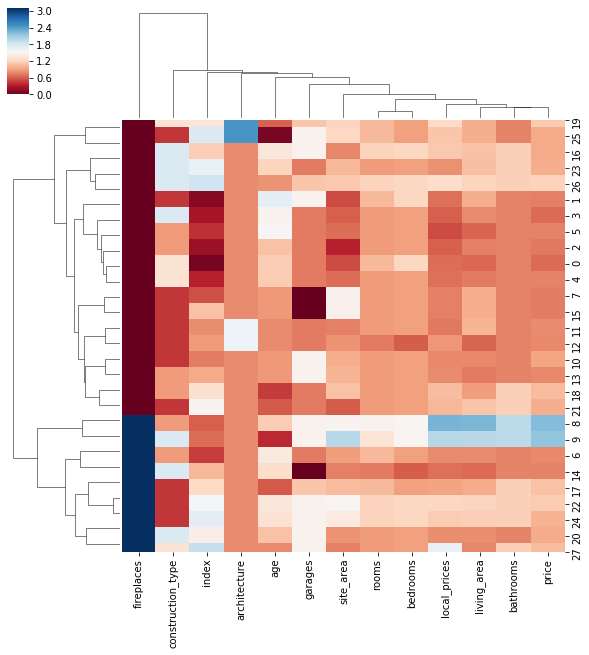

In [93]:
sns.clustermap(df / df.mean(), cmap = 'RdBu')
#Horquillas más pequeñas, se parecen más las casas entre sí

# Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

#Es un generador de código D3. Está orientado a visualización interactiva.

# Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

#Las visualizaciones más chulas están hechas en D3

## Dash

"Shiny for Python" 
Librería de R para crear un dashboard

# See Also: Vega

http://vega.github.io/



# Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

# Additional references

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)